<a href="https://colab.research.google.com/github/codesongs/codestates_TP2/blob/main/%EA%B8%B4%EA%B8%89%EC%9C%A0%EC%82%AC%EB%8F%84%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/tp2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# surprise 라이브러리 설치
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811604 sha256=b1fd99dba8e23d2a8df58f347644ed6dd403aba52c421aa82354ab762ae75481
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
!pip install gensim pandas

In [ ]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, accuracy

import warnings; warnings.simplefilter('ignore')

In [ ]:
# 데이터 가져오기
import os
import pandas as pd

def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

df_ratings = load_ratings(path)
df_movies = load_movies(path)
df_users = load_users(path)

In [ ]:
md = pd.read_csv(os.path.join(path,"b_k_mov_rat.csv"))
md = md[['MovieID', 'title', 'year', 'id', 'genres', 'popularity',
       'overview', 'tagline', 'b_vote_average', 'b_vote_count', 'cast', 'crew',
       'keywords']]
md.head()

,MovieID,title,year,id,genres,popularity,overview,tagline,b_vote_average,b_vote_count,cast,crew,keywords
0,1,Toy Story,1995,862.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,"Led by Woody, Andy's toys live happily in his ...",0,4.146846,2077.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,Jumanji,1995,8844.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,3.201141,701.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,Grumpier Old Men,1995,15602.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.712900,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,3.016736,478.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,Waiting to Exhale,1995,31357.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,2.729412,170.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,Father of the Bride Part II,1995,11862.0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,3.006757,296.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
md.iloc[1].tagline

In [ ]:
md.iloc[1].cast

In [ ]:
md.iloc[0].crew

In [ ]:
md.iloc[0].keywords

In [ ]:
df_movies.head() # movieId 일치함 확인 (데이터 증강 가능)

,movieId,title,genres,clean_title
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",Toy Story
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",Jumanji
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",Waiting to Exhale
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II


In [ ]:
# b_vote_count
print(df_ratings[df_ratings.movieId==1])

# b_vote_average
np.mean(df_ratings[df_ratings.movieId==1].rating)

        userId  movieId  rating  timestamp
40           1        1       5  978824268
469          6        1       4  978237008
581          8        1       4  978233496
711          9        1       5  978225952
837         10        1       5  978226474
...        ...      ...     ...        ...
997248    6022        1       5  956755763
997541    6025        1       5  956812867
998170    6032        1       4  956718127
998360    6035        1       4  956712849
999870    6040        1       3  957717358

[2077 rows x 4 columns]


4.146846413095811

In [ ]:
import pandas as pd
import os

# 필요한 열만 선택
new_md = md[['MovieID', 'title', 'year', 'genres', 'overview', 'tagline', 'cast', 'crew', 'keywords']]

def get_first_five_actors(cast_str):
    if not isinstance(cast_str, str):  # cast_str이 문자열이 아니면 빈 문자열을 반환
        return ''

    cast_list = eval(cast_str)
    names = [actor['name'] for actor in cast_list[:5]]
    return '|'.join(names)

new_md['cast'] = new_md['cast'].apply(get_first_five_actors)


def extract_director_name(crew_data_str):
    if not isinstance(crew_data_str, str):  # crew_data_str이 문자열이 아니면 None을 반환
        return None

    crew_data = eval(crew_data_str)
    for crew_member in crew_data:
        if crew_member['job'] == 'Director':
            return crew_member['name']
    return None

new_md['crew'] = new_md['crew'].apply(extract_director_name)


def extract_keywords(keywords_data_str):
    # keywords_data_str이 문자열이 아니면 빈 문자열을 반환
    if not isinstance(keywords_data_str, str):
        return ""

    keywords_data = eval(keywords_data_str)
    keyword_list = [keyword['name'] for keyword in keywords_data]
    cleaned_keywords = set()
    for keyword in keyword_list:
        root_keyword = keyword.split()[0]  # 어근만 추출
        cleaned_keywords.add(root_keyword)
    return '|'.join(cleaned_keywords)

new_md['keywords'] = new_md['keywords'].apply(extract_keywords)

# 최종 데이터프레임 확인
new_md.head()



,MovieID,title,year,genres,overview,tagline,cast,crew,keywords
0,1,Toy Story,1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,friends|toy|jealousy|friendship|rivalry|new|boy
1,2,Jumanji,1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,disappearance|giant|board|recluse|based|new
2,3,Grumpier Old Men,1995,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch,best|old|duringcreditsstinger|fishing
3,4,Waiting to Exhale,1995,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,chick|interracial|based|divorce|single
4,5,Father of the Bride Part II,1995,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,pregnancy|gynecologist|midlife|baby|aging|conf...


In [ ]:
# null 값을 포함하는 행만 출력
null_rows = new_md[new_md.isnull().any(axis=1)]
print(null_rows)

      MovieID                            title  year genres overview tagline  \
10         11          American President, The  1995    NaN      NaN     NaN   
28         29       City of Lost Children, The  1995    NaN      NaN     NaN   
45         46    How to Make an American Quilt  1995    NaN      NaN     NaN   
49         50              Usual Suspects, The  1995    NaN      NaN     NaN   
53         54                   Big Green, The  1995    NaN      NaN     NaN   
...       ...                              ...   ...    ...      ...     ...   
3866     3936        Phantom of the Opera, The  1943    NaN      NaN     NaN   
3868     3938      Slumber Party Massacre, The  1982    NaN      NaN     NaN   
3869     3939   Slumber Party Massacre II, The  1987    NaN      NaN     NaN   
3870     3940  Slumber Party Massacre III, The  1990    NaN      NaN     NaN   
3882     3952                   Contender, The  2000    NaN      NaN     NaN   

     cast  crew keywords  
10         N

In [ ]:
new_md

,MovieID,title,year,genres,overview,tagline,cast,crew,keywords
0,1,Toy Story,1995,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,friends|toy|jealousy|friendship|rivalry|new|boy
1,2,Jumanji,1995,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston,disappearance|giant|board|recluse|based|new
2,3,Grumpier Old Men,1995,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch,best|old|duringcreditsstinger|fishing
3,4,Waiting to Exhale,1995,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker,chick|interracial|based|divorce|single
4,5,Father of the Bride Part II,1995,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer,pregnancy|gynecologist|midlife|baby|aging|conf...
...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,2000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","Greg Focker is ready to marry his girlfriend, ...",First comes love. Then comes the interrogation.,Ben Stiller|Robert De Niro|Teri Polo|Blythe Da...,Jay Roach,airport|jew|cia|airplane|father-in-law|epistax...
3879,3949,Requiem for a Dream,2000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",The hopes and dreams of four ambitious people ...,0,Ellen Burstyn|Jared Leto|Jennifer Connelly|Mar...,Darren Aronofsky,speed|diet|illegal|drug|junkie|heroin|unsociab...
3880,3950,Tigerland,2000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",A group of recruits go through Advanced Infant...,The system wanted them to become soldiers. One...,Colin Farrell|Matthew Davis|Clifton Collins Jr...,Joel Schumacher,awol|military|guitar|stockade|fort|target|simu...
3881,3951,Two Family House,2000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Buddy Visalo (Michael Rispoli) is a factory wo...,The only way to find out what you love is to r...,Michael Rispoli|Kelly Macdonald|Kathrine Nardu...,Raymond De Felitta,


In [ ]:
[ 0 0 0 1 0 1 0 0 ] movie a
[ 0 0 1 1 0 0 1 0 ] movie b
두개의 유사도 0.3

In [ ]:
   a b c ... 3883
a  1 0.3 0.5 ..
b     1
c       1
..
3883


In [ ]:
movie a title = 'aaaabb' -> [ 0.23  0.33] embedding vector형태
movie b title = 'cccddd' -> [ 0.233  0.33678] embedding vector형태

   a b c ... 3883
a  1 0.5 0.6 ..
b     1
c       1
..
3883 행렬이름 MC

In [ ]:
유저 56이 본 영화 ~~~ = d
예원님 방식 : 평점이 제일 높은 영화중 가장 최근 timestamp였던 영화를 기준으로 유사한 영화 20개 추천

d에 대한 모든 영화의 유사도가 다 있다. MC.iloc[3] = d 에 대한 모든 영화의 유사도가 다 나온다
20개 뽑는다 (이미 유저 56이 본 영화 제외) 영화리스트 = [....20개]
평점순서대로 유저 56이 본 영화 [...20개까지]           vs 비교

SyntaxError: ignored

In [ ]:
# 'movieId'와 'userId'를 기준으로 데이터프레임 통합
df_total = pd.merge(df_ratings, df_movies, on='movieId', how='left')
df_total = pd.merge(df_total, df_users, on='userId', how='left')

# 결과 확인
df_total

,userId,movieId,rating,timestamp,title,genres,gender,age,Occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [ ]:
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

def remove_year(title):
    return re.sub(r'\(\d{4}\)', '', title).strip()

# df_movies에서 제목을 가져옴
df_movies['clean_title'] = df_movies['title'].apply(remove_year)
titles = df_movies['clean_title'].tolist()

# Word2Vec 모델 학습
sentences = [title.split() for title in titles]
model = Word2Vec(sentences, vector_size=100, window=3, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=100)

# 제목에 대한 벡터 표현을 가져오는 함수 (숫자 뒷부분 가중치 조정)
# def get_vector(title):
#     words = title.split()
#     vectors = []
#     for word in words:
#         if word in model.wv:
#             if re.search(r'\d+$', word):  # 숫자가 있는 경우 가중치 조정
#                 vectors.append(model.wv[word] * 0.1)  # 가중치 조정
#             else:
#                 vectors.append(model.wv[word])  # 숫자가 없는 경우 기본 벡터 사용

#     if len(vectors) > 0:
#         return sum(vectors) / len(vectors)
#     else:
#         return None
def get_vector(title):
    vector_size = 200  # Word2Vec 모델의 벡터 크기
    words = title.split()
    vectors = []
    for word in words:
        if word in model.wv:
            if re.search(r'\d+$', word):  # 숫자가 있는 경우 가중치 조정
                vectors.append(model.wv[word] * 0.01)  # 가중치 조정
            else:
                vectors.append(model.wv[word])  # 숫자가 없는 경우 기본 벡터 사용

    if len(vectors) > 0:
        return sum(vectors) / len(vectors)
    else:
        return [0] * vector_size  # 모든 값이 0인 벡터 반환


# 코사인 유사도 계산
# title_vectors = [get_vector(title) for title in titles]
title_vectors = [get_vector(title) for title in titles]
similarity_matrix = cosine_similarity(title_vectors)

valid_title_indices = [i for i, vector in enumerate(title_vectors) if vector is not None]
valid_title_vectors = [title_vectors[i] for i in valid_title_indices]
valid_titles = [titles[i] for i in valid_title_indices]
#similarity_matrix = cosine_similarity(valid_title_vectors)

# # "Toy Story"와 가장 유사한 영화 20개 찾기
# movie_index = valid_titles.index("Toy Story")
# similarities = similarity_matrix[movie_index]
# similar_movie_indices = similarities.argsort()[-21:-1][::-1]

# # 결과 DataFrame 작성
# movie_ids = [df_movies[df_movies['clean_title'] == valid_titles[i]]['movieId'].iloc[0] for i in similar_movie_indices]
# similar_movies_titles = [df_movies[df_movies['clean_title'] == valid_titles[i]]['title'].iloc[0] for i in similar_movie_indices]
# similar_movies_cosine = [similarities[i] for i in similar_movie_indices]

# result_df = pd.DataFrame({
#     'movieId': movie_ids,
#     'title': similar_movies_titles,
#     'cosine_similarity': similar_movies_cosine
# })

# result_df = result_df.sort_values(by='cosine_similarity', ascending=False)

# result_df
# "Toy Story"와 가장 유사한 영화 20개 찾기
movie_index = titles.index("Toy Story")
similarities = similarity_matrix[movie_index]
similar_movie_indices = similarities.argsort()[-21:-1][::-1]

# 결과 DataFrame 작성
movie_ids = [df_movies[df_movies['clean_title'] == titles[i]]['movieId'].iloc[0] for i in similar_movie_indices]
similar_movies_titles = [df_movies[df_movies['clean_title'] == titles[i]]['title'].iloc[0] for i in similar_movie_indices]
similar_movies_cosine = [similarities[i] for i in similar_movie_indices]

result_df = pd.DataFrame({
    'movieId': movie_ids,
    'title': similar_movies_titles,
    'cosine_similarity': similar_movies_cosine
})

result_df = result_df.sort_values(by='cosine_similarity', ascending=False)

result_df


,movieId,title,cosine_similarity
0,3114,Toy Story 2 (1999),0.999973
1,2274,Lilian's Story (1995),0.998518
2,2108,L.A. Story (1991),0.992660
3,1947,West Side Story (1961),0.968024
4,1140,Entertaining Angels: The Dorothy Day Story (1996),0.919325
5,126,"NeverEnding Story III, The (1994)",0.908128
6,2149,House II: The Second Story (1987),0.903409
7,3400,We're Back! A Dinosaur's Story (1993),0.897535
8,1654,FairyTale: A True Story (1997),0.895618
9,3621,Possession (1981),0.892503


In [ ]:
len(title_vectors)

3883

In [ ]:
def recommend_movies_by_user(userId, n_movies=20):
    # 해당 userId의 시청 영화 리스트를 가져옵니다. df_ratings 데이터 프레임을 사용하였습니다.
    watched_movie_ids = df_ratings[df_ratings['userId'] == userId]['movieId'].tolist()
    watched_movies = df_movies[df_movies['movieId'].isin(watched_movie_ids)]['clean_title'].tolist()

    # 해당 영화들의 벡터를 가져와 평균을 구합니다.
    vectors = [get_vector(movie) for movie in watched_movies if get_vector(movie) is not None]
    if len(vectors) == 0:
        return None
    avg_vector = sum(vectors) / len(vectors)

    # 모든 영화에 대한 코사인 유사도를 계산합니다.
    avg_vector = avg_vector.reshape(1, -1)
    similarities = cosine_similarity(avg_vector, valid_title_vectors)[0]

    # 유사도가 가장 높은 영화의 인덱스를 가져옵니다.
    similar_movie_indices = similarities.argsort()[-n_movies-1:-1][::-1]  # -1을 두 번 사용하는 것은 자기 자신을 제외하기 위함입니다.

    # 결과 DataFrame 작성
    movie_ids = [df_movies[df_movies['clean_title'] == valid_titles[i]]['movieId'].iloc[0] for i in similar_movie_indices]
    similar_movies_titles = [df_movies[df_movies['clean_title'] == valid_titles[i]]['title'].iloc[0] for i in similar_movie_indices]
    similar_movies_cosine = [similarities[i] for i in similar_movie_indices]

    result_df = pd.DataFrame({
        'movieId': movie_ids,
        'title': similar_movies_titles,
        'cosine_similarity': similar_movies_cosine
    })

    result_df = result_df.sort_values(by='cosine_similarity', ascending=False)

    return result_df

# 예시: userId 1의 경우 추천받을 영화 20개를 출력합니다.
recommend_movies_by_user(56)


,movieId,title,cosine_similarity
0,3055,Felicia's Journey (1999),0.980305
1,1864,Sour Grapes (1998),0.978171
2,1361,Paradise Lost: The Child Murders at Robin Hood...,0.977210
3,2284,Bandit Queen (1994),0.976905
4,548,Terminal Velocity (1994),0.975340
5,1597,Conspiracy Theory (1997),0.974614
6,1673,Boogie Nights (1997),0.972845
7,2857,Yellow Submarine (1968),0.972524
8,836,Chain Reaction (1996),0.971826
9,3498,Midnight Express (1978),0.971167


In [ ]:
import math

def get_true_ranking(user_id):
    user_ratings = df_ratings[df_ratings['userId'] == user_id]
    sorted_ratings = user_ratings.sort_values(by='rating', ascending=False)
    return sorted_ratings['movieId'].tolist()

def calculate_ndcg(y_true, y_score, k=20):
    actual = [0] * k
    ideal = [0] * k

    # Getting relevance for the ideal DCG
    for i in range(k):
        if i < len(y_true):
            ideal[i] = 1

    # Getting relevance scores for actual DCG
    for i in range(k):
        if i < len(y_score) and y_score[i] in y_true:
            actual[i] = 1

    dcg = sum([(2**val - 1) / (math.log2(i + 2)) for i, val in enumerate(actual)])
    ideal_dcg = sum([(2**val - 1) / (math.log2(i + 2)) for i, val in enumerate(ideal)])

    if ideal_dcg == 0:  # To handle cases where ideal_dcg might be zero
        return 0
    return dcg / ideal_dcg

def calculate_recall(y_true, y_score, k=20):
    recommended_relevant = len(set(y_true[:k]) & set(y_score[:k]))
    total_relevant = len(y_true)

    if total_relevant == 0:  # To handle cases where there are no relevant items
        return 0

    return recommended_relevant / total_relevant


ndcgs = []
recalls = []

for user_id in range(1, 101):
    print(user_id)
    recommendations = recommend_movies_by_user(user_id)
    if recommendations is not None:
        y_true = get_true_ranking(user_id)
        y_score = recommendations['movieId'].tolist()

        recalls.append(calculate_recall(y_true, y_score))
        ndcgs.append(calculate_ndcg(y_true, y_score))  # Add this line to calculate NDCG

average_recall = sum(recalls) / len(recalls)
average_ndcg = sum(ndcgs) / len(ndcgs)  # Calculate average NDCG

print(f"Average NDCG@20: {average_ndcg}")  # Print average NDCG
print(f"Average Recall@20: {average_recall}")


In [ ]:
df_movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream
3880,3950,Tigerland (2000),Drama,Tigerland
3881,3951,Two Family House (2000),Drama,Two Family House


In [ ]:
# 장르 원핫인코딩
df_movies['genres'] = df_movies['genres'].str.split('|')
genre_encoded = pd.get_dummies(df_movies['genres'].apply(pd.Series).stack()).sum(level=0)

# 영화별 장르 벡터 생성
genre_vectors = genre_encoded.values
similarity_matrix_genre = cosine_similarity(genre_vectors)

In [ ]:
def recommend_movies_by_user(userId, p=0.5, n_movies=3884):
    # 1. 제목 유사도 기반
    watched_movie_ids = df_ratings[df_ratings['userId'] == userId]['movieId'].tolist()
    watched_movies = df_movies[df_movies['movieId'].isin(watched_movie_ids)]['clean_title'].tolist()
    vectors = [get_vector(movie) for movie in watched_movies if get_vector(movie) is not None]
    avg_vector = sum(vectors) / len(vectors)
    avg_vector = avg_vector.reshape(1, -1)
    title_similarities = cosine_similarity(avg_vector, title_vectors)[0]

    # 2. 장르 유사도 기반
    watched_genres = genre_encoded[df_movies['movieId'].isin(watched_movie_ids)]
    avg_genre_vector = watched_genres.mean(axis=0).values.reshape(1, -1)
    genre_similarities = cosine_similarity(avg_genre_vector, genre_vectors)[0]

    # 3. 두 유사도 합치기
    combined_similarities = p * title_similarities + (1-p) * genre_similarities

    similar_movie_indices = combined_similarities.argsort()[-n_movies-1:-1][::-1]

    movie_ids = [df_movies.iloc[i]['movieId'] for i in similar_movie_indices]
    similar_movies_titles = [df_movies.iloc[i]['title'] for i in similar_movie_indices]
    similar_movies_cosine = [combined_similarities[i] for i in similar_movie_indices]

    result_df = pd.DataFrame({
        'movieId': movie_ids,
        'title': similar_movies_titles,
        'combined_similarity': similar_movies_cosine
    })

    result_df = result_df.sort_values(by='combined_similarity', ascending=False)

    return result_df

# 예시
recommend_movies_by_user(56, p=0.5)

,movieId,title,combined_similarity
0,3407,"Carriers Are Waiting, The (Les Convoyeurs Atte...",0.907897
1,794,Midnight Dancers (Sibak) (1994),0.907478
2,235,Ed Wood (1994),0.901997
3,1467,Salut cousin! (1996),0.899092
4,1146,Curtis's Charm (1995),0.898726
...,...,...,...
3877,3236,Zachariah (1971),-0.065714
3878,2526,Meteor (1979),-0.079009
3879,3877,Supergirl (1984),-0.080392
3880,2193,Willow (1988),-0.085666


In [ ]:
ab = recommend_movies_by_user(56, p=0.5)
dc = ab[ab.movieId.isin([1265, 356, 2599, 589, 223, 47, 1266, 16, 1610, 3006, 1784, 1912, 2268, 3147, 2391, 1639, 441, 1682, 2324, 590])]
dc # recvae

,movieId,title,combined_similarity
203,2324,Life Is Beautiful (La Vita è bella) (1997),0.796606
366,1784,As Good As It Gets (1997),0.778420
422,3147,"Green Mile, The (1999)",0.768096
475,1639,Chasing Amy (1997),0.761879
761,356,Forrest Gump (1994),0.732337
814,2268,"Few Good Men, A (1992)",0.727160
957,1682,"Truman Show, The (1998)",0.715887
1549,47,Seven (Se7en) (1995),0.654204
1775,1265,Groundhog Day (1993),0.628568
1820,3006,"Insider, The (1999)",0.624191


In [ ]:
ef = ab[ab.movieId.isin([318, 527, 2028, 2762, 3114, 50, 593, 1, 2571, 2858, 608, 150, 246, 296, 110, 1213, 1617, 2997, 1358, 2396])]
ef # 비개인화 기준 추천


,movieId,title,combined_similarity
136,2858,American Beauty (1999),0.801163
232,150,Apollo 13 (1995),0.794843
276,296,Pulp Fiction (1994),0.790700
412,527,Schindler's List (1993),0.769393
614,2028,Saving Private Ryan (1998),0.746873
693,2997,Being John Malkovich (1999),0.739139
760,1358,Sling Blade (1996),0.732360
863,593,"Silence of the Lambs, The (1991)",0.723947
1105,318,"Shawshank Redemption, The (1994)",0.701202
1777,1617,L.A. Confidential (1997),0.628382


In [ ]:
import math
import re
from sklearn.metrics.pairwise import cosine_similarity

def get_vector(title):
    vector_size = 200  # Word2Vec 모델의 벡터 크기
    words = title.split()
    vectors = []
    for word in words:
        if word in model.wv:
            if re.search(r'\d+$', word):  # 숫자가 있는 경우 가중치 조정
                vectors.append(model.wv[word] * 0.01)  # 가중치 조정
            else:
                vectors.append(model.wv[word])  # 숫자가 없는 경우 기본 벡터 사용

    if len(vectors) > 0:
        return sum(vectors) / len(vectors)
    else:
        return [0] * vector_size  # 모든 값이 0인 벡터 반환

def calculate_similarity(title1, title2):
    # 각 영화 제목의 벡터를 가져옵니다.
    vector1 = get_vector(title1)
    vector2 = get_vector(title2)

    # 두 영화 제목 간의 코사인 유사도를 계산합니다.
    similarity = cosine_similarity([vector1], [vector2])[0][0]
    return similarity

def calculate_popularity(movie_id):
    # movieId 컬럼에서 해당 movieId의 개수를 세어 popularity로 반환
    popularity = df_ratings[df_ratings['movieId'] == movie_id].shape[0]
    return popularity

def calculate_diversity(recommended_df):
    num_items = len(recommended_df)
    if num_items <= 1:
        return 0.0

    similarity_sum = 0.0
    for i in range(num_items):
        for j in range(i + 1, num_items):
            similarity = calculate_similarity(recommended_df.iloc[i]['title'], recommended_df.iloc[j]['title'])
            similarity_sum += similarity

    average_similarity = similarity_sum / (num_items * (num_items - 1) / 2)
    return 1 - average_similarity

def calculate_novelty(recommended_df):
    novelty_sum = 0.0
    for _, row in recommended_df.iterrows():
        popularity = calculate_popularity(row['movieId'])

        # popularity가 0인 경우 예외 처리
        if popularity == 0:
            continue

        novelty = 1 / (math.log(1 + popularity))
        novelty_sum += novelty

    return novelty_sum / len(recommended_df)

# 예시 데이터: 추천 목록
diversity_score = calculate_diversity(je3an)
novelty_score = calculate_novelty(je3an)

print("Diversity Score:", diversity_score)
print("Novelty Score:", novelty_score)


Diversity Score: 0.48394669601203577
Novelty Score: 0.23129316609470246


In [ ]:
recommend_movies_by_user(56, p=0.3)

,movieId,title,combined_similarity
0,3407,"Carriers Are Waiting, The (Les Convoyeurs Atte...",0.881164
1,794,Midnight Dancers (Sibak) (1994),0.881161
2,235,Ed Wood (1994),0.881123
3,3227,"Not Love, Just Frenzy (Más que amor, frenesí) ...",0.880748
4,2596,SLC Punk! (1998),0.878029
5,1276,Cool Hand Luke (1967),0.877962
6,3548,Auntie Mame (1958),0.877709
7,2504,200 Cigarettes (1999),0.877204
8,3495,Roadside Prophets (1992),0.877151
9,657,Yankee Zulu (1994),0.877066


In [ ]:
recommend_movies_by_user(56, p=0.7)

,movieId,title,combined_similarity
0,3407,"Carriers Are Waiting, The (Les Convoyeurs Atte...",0.927857
1,794,Midnight Dancers (Sibak) (1994),0.927849
2,235,Ed Wood (1994),0.927761
3,2596,SLC Punk! (1998),0.920542
4,1276,Cool Hand Luke (1967),0.920384
5,3548,Auntie Mame (1958),0.919794
6,2504,200 Cigarettes (1999),0.918617
7,3495,Roadside Prophets (1992),0.918493
8,657,Yankee Zulu (1994),0.918295
9,205,Unstrung Heroes (1995),0.917468


In [ ]:
import numpy as np
def get_actual_watched_movies(user_id, df_ratings):
    if user_id not in df_ratings['userId'].values:
        return []
    user_movies = df_ratings[df_ratings['userId'] == user_id]['movieId'].tolist()
    return user_movies


def calculate_recall_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_at_k = predicted[:k]
    num_correct = len(actual_set.intersection(predicted_at_k))
    recall = num_correct / 20
    return recall

def calculate_ndcg_at_k(actual, predicted, k):
    dcg = 0.0
    idcg = 0.0

    for i in range(k):
        item = predicted[i]
        if item in actual:
            dcg += 1.0 / np.log2(i + 2)

    ideal_order = sorted(actual, key=lambda x: predicted.index(x) if x in predicted else float('inf'))

    for i in range(min(k, len(actual))):
        if ideal_order[i] in predicted:  # Check if the item is in predicted list
            idcg += 1.0 / np.log2(i + 2)

    ndcg = dcg / idcg if idcg > 0 else 0
    return ndcg

total_recall_20 = 0
total_ndcg_20 = 0
num_users = df_ratings['userId'].nunique()  # userId의 유니크한 값의 개수를 사용

# for user_id in df_ratings['userId'].unique():
for user_id in range(1,1001):
    print(user_id)
    recommended_movies_df = recommend_movies_by_user(user_id, p=0)
    recommended_movie_ids = recommended_movies_df['movieId'].tolist()
    actual_watched_movies = get_actual_watched_movies(user_id, df_ratings)

    recall_20 = calculate_recall_at_k(actual_watched_movies, recommended_movie_ids, k=20)
    ndcg_20 = calculate_ndcg_at_k(actual_watched_movies, recommended_movie_ids, k=20)

    total_recall_20 += recall_20
    total_ndcg_20 += ndcg_20

average_recall_20 = total_recall_20 / 1000
average_ndcg_20 = total_ndcg_20 / 1000

print("Average Recall@20:", average_recall_20)
print("Average nDCG@20:", average_ndcg_20)


In [ ]:
similarity_matrix.shape

(3841, 3841)

In [ ]:
df_total.movieId.nunique()

3706

In [ ]:
df_movies.movieId.nunique()

3883

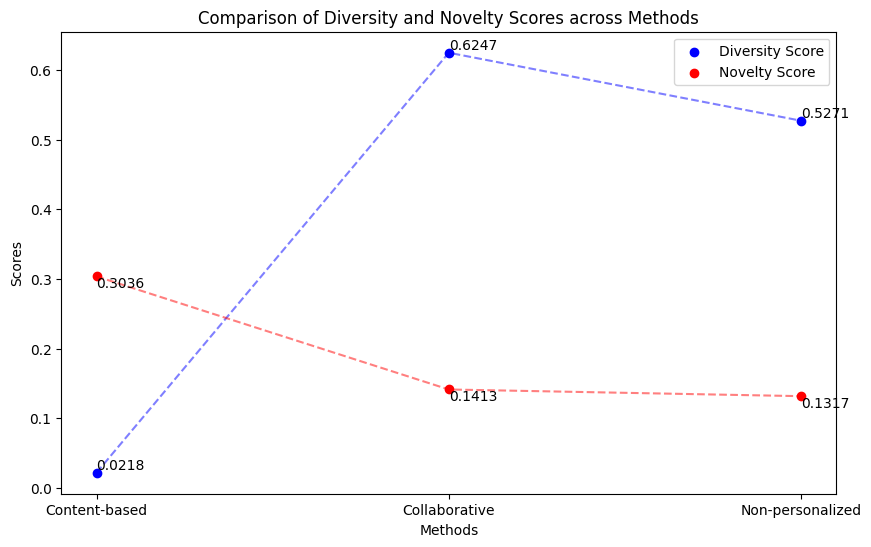

In [ ]:
import matplotlib.pyplot as plt

# 데이터 정의
methods = ["Content-based", "Collaborative", "Non-personalized"]
diversity_scores = [0.0218, 0.6247, 0.5271]
novelty_scores = [0.3036, 0.1413, 0.1317]

# 시각화
plt.figure(figsize=(10,6))

# Diversity Score 플로팅
plt.scatter(methods, diversity_scores, color='b', label='Diversity Score')
for i, txt in enumerate(diversity_scores):
    plt.text(methods[i], txt, str(txt), verticalalignment='bottom')

# Novelty Score 플로팅
plt.scatter(methods, novelty_scores, color='r', label='Novelty Score')
for i, txt in enumerate(novelty_scores):
    plt.text(methods[i], txt, str(txt), verticalalignment='top')

# 레이블 및 제목 설정
plt.xlabel('Methods')
plt.ylabel('Scores')
plt.title('Comparison of Diversity and Novelty Scores across Methods')
plt.legend(loc='upper right')

# 추세선 추가
plt.plot(methods, diversity_scores, color='b', linestyle='--', alpha=0.5)
plt.plot(methods, novelty_scores, color='r', linestyle='--', alpha=0.5)

plt.show()


In [ ]:
rec100=[1265, 356, 2599, 589, 223, 47, 1266, 16, 1610, 3006, 1784, 1912, 2268, 3147, 2391, 1639, 441, 1682, 2324, 590, 2959, 3578, 21, 293, 2692, 1673, 1625, 3160, 1466, 1517, 3253, 2700, 480, 1094, 866, 357, 1393, 2291, 377, 858, 3386, 1721, 3418, 3255, 32, 1210, 300, 1343, 3481, 1148, 1196, 595, 2908, 3499, 1396, 1580, 555, 2336, 3793, 745, 2916, 1233, 1179, 1834, 3897, 1883, 3178, 3176, 260, 800, 2501, 1193, 1584, 1221, 508, 2108, 428, 3753, 529, 3252, 3408, 553, 3052, 2058, 3751, 2502, 1198, 1147, 1270, 337, 1747, 1357, 2628, 1449, 235, 1197, 349, 733, 1097, 1694]


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
movieId_df = pd.read_csv('movieId.csv')
movieId_df

Saving movieId.csv to movieId.csv


,movieId
0,1265
1,356
2,2599
3,589
4,223
...,...
3396,3924
3397,3875
3398,3642
3399,3488


In [ ]:
je2an = ab[ab.movieId.isin(rec100)][:20]
je1an = ab[:100].movieId.isin(movieId_df.movieId)
je2an

,movieId,title,combined_similarity
2,235,Ed Wood (1994),0.901997
23,3897,Almost Famous (2000),0.893953
68,3255,"League of Their Own, A (1992)",0.837187
101,1673,Boogie Nights (1997),0.810932
113,21,Get Shorty (1995),0.807089
115,2959,Fight Club (1999),0.806726
139,3408,Erin Brockovich (2000),0.800671
188,2501,October Sky (1999),0.797594
203,2324,Life Is Beautiful (La Vita è bella) (1997),0.796606
213,508,Philadelphia (1993),0.796184


In [ ]:
# ab에서 상위 100개의 movieId를 선택
selected_movieIds = ab['movieId'][:100]

# movieId_df의 movieId 순서에 따라 selected_movieIds를 정렬
sorted_ids = movieId_df[movieId_df['movieId'].isin(selected_movieIds)]['movieId']

# sorted_ids에 따라 ab에서 필요한 행들을 가져옴
sorted_df = ab[ab['movieId'].isin(sorted_ids)].set_index('movieId').loc[sorted_ids].reset_index()

# 상위 20개의 항목 출력
je1an = sorted_df.head(20)
je1an

,movieId,title,combined_similarity
0,3255,"League of Their Own, A (1992)",0.837187
1,3897,Almost Famous (2000),0.893953
2,235,Ed Wood (1994),0.901997
3,1885,"Opposite of Sex, The (1998)",0.812739
4,1476,Private Parts (1997),0.885372
5,1968,"Breakfast Club, The (1985)",0.839679
6,111,Taxi Driver (1976),0.820809
7,1916,Buffalo 66 (1998),0.839420
8,2248,Say Anything... (1989),0.865986
9,1914,Smoke Signals (1998),0.881998


In [ ]:
# ab와 movieId_df의 상위 10개 항목에서 movieId 추출
ab_movieIds = ab['movieId'].tolist()
movieId_df_movieIds = movieId_df['movieId'].tolist()

non_duplicate_ids = []

ab_index = 0
movieId_df_index = 0

# non_duplicate_ids의 크기가 20이 될 때까지 반복
while len(non_duplicate_ids) < 20:
    if ab_index < len(ab_movieIds):
        if ab_movieIds[ab_index] not in non_duplicate_ids:
            non_duplicate_ids.append(ab_movieIds[ab_index])

        ab_index += 1  # ab의 다음 항목으로 이동

    if movieId_df_index < len(movieId_df_movieIds):
        if movieId_df_movieIds[movieId_df_index] not in non_duplicate_ids:
            non_duplicate_ids.append(movieId_df_movieIds[movieId_df_index])

        movieId_df_index += 1  # movieId_df의 다음 항목으로 이동

non_duplicate_ids


[3407,
 1265,
 794,
 356,
 235,
 2599,
 1467,
 589,
 1146,
 223,
 3495,
 47,
 3548,
 1266,
 2431,
 16,
 2596,
 1610,
 133,
 3006]

In [ ]:
je3an = ab[ab.movieId.isin(non_duplicate_ids)]
je3an

,movieId,title,combined_similarity
0,3407,"Carriers Are Waiting, The (Les Convoyeurs Atte...",0.907897
1,794,Midnight Dancers (Sibak) (1994),0.907478
2,235,Ed Wood (1994),0.901997
3,1467,Salut cousin! (1996),0.899092
4,1146,Curtis's Charm (1995),0.898726
5,3495,Roadside Prophets (1992),0.898643
6,3548,Auntie Mame (1958),0.898515
7,2431,Patch Adams (1998),0.897992
8,2596,SLC Punk! (1998),0.897876
9,133,Nueba Yol (1995),0.897647


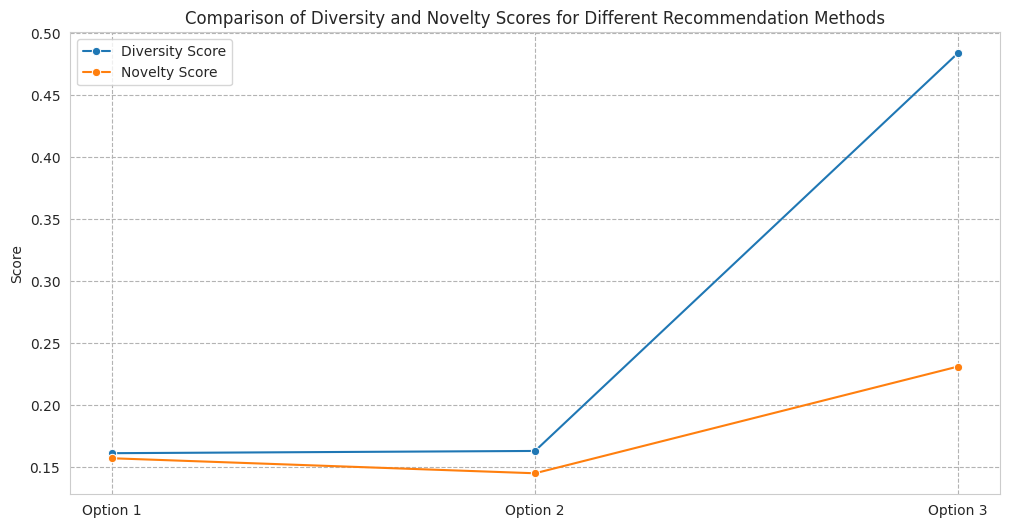

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 설정
methods = ['Option 1', 'Option 2', 'Option 3']
diversity_scores = [0.1615, 0.1633, 0.4839]
novelty_scores = [0.1574, 0.1453, 0.2313]

# 시각화 설정
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(x=methods, y=diversity_scores, marker="o", label="Diversity Score")
sns.lineplot(x=methods, y=novelty_scores, marker="o", label="Novelty Score")

plt.title("Comparison of Diversity and Novelty Scores for Different Recommendation Methods")
plt.ylabel("Score")
plt.legend(loc="upper left")
plt.grid(True, which="both", ls="--", c='0.7')

plt.show()
